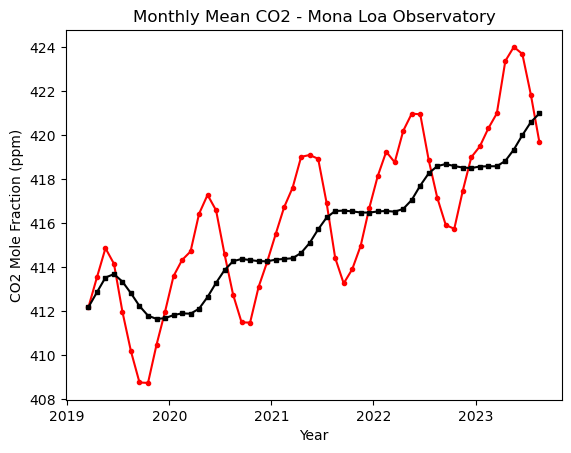

In [87]:
# Monthly Mean CO2 Data
# Chat GPT: How to plot loaded csv file in pandas
import pandas as pd
import matplotlib.pyplot as plt
co2_data = "Data\co2_mm_mlo.csv"
df = pd.read_csv(co2_data, comment = '#')

# Chat GPT: How to plot last data entries
plt.plot(df["decimal date"].tail(54), df["average"].tail(54), color = 'r', marker = 'o', markersize = 3)

# Chat GPT: Plot a seasonal correction
seasonal_frequency = 10
rolling_mean = df["average"].tail(54).rolling(window = seasonal_frequency, min_periods = 1).mean()
plt.plot(df["decimal date"].tail(54), rolling_mean, color = "black", marker = "s", markersize = 3)

plt.xlabel("Year")
plt.ylabel("CO2 Mole Fraction (ppm)")
plt.title("Monthly Mean CO2 - Mona Loa Observatory")
plt.show()

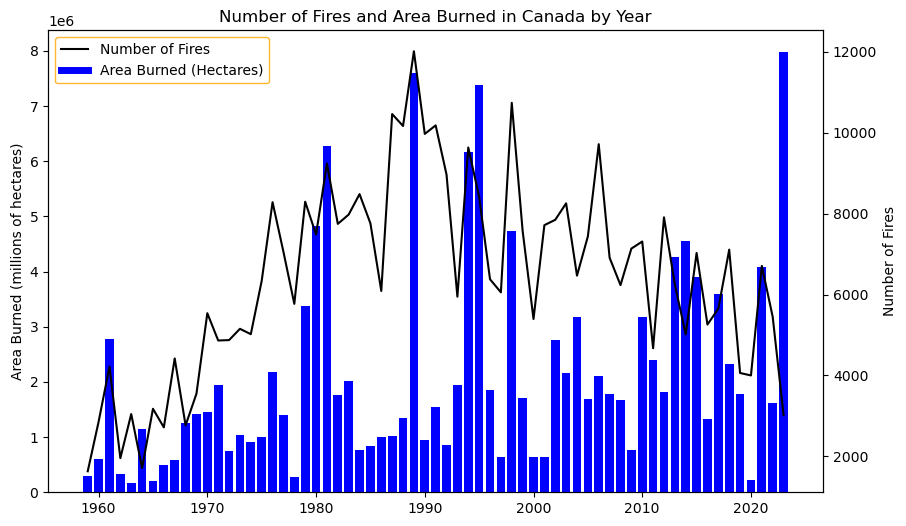

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

nfdb = "Data/NFDB_point_stats.csv"
data = pd.read_csv(nfdb, comment = '#', thousands = ',')

# Chat GPT: How to have 2 y-axes on the same plot
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.bar(data["YEAR"], data["TOTAL_HA"], color = 'blue', label = "Area burned, CNFDB")
ax1.set_ylabel("Area Burned (millions of hectares)")
ax2 = ax1.twinx()
ax2.plot(data["YEAR"], data["FIRES"], color = 'black', label = "Number of fires, CNFDB")
ax2.set_xlabel("Years")
ax2.set_ylabel('Number of Fires')

legend1 = plt.Line2D([], [], color = 'k', label = 'Number of Fires')
legend2 = plt.Line2D([], [], color = 'b', linewidth = 5, label = 'Area Burned (Hectares)')
ax1.legend(handles = [legend1, legend2], loc = 'upper left', frameon = True, edgecolor = 'orange')

plt.title("Number of Fires and Area Burned in Canada by Year")
plt.show()